In [1]:
kwList = ['Caterpillar',
 'General Electric',
 'Honeywell International',
 'Lockheed Martin',
 'Deere &',
 'Delta Air Lines',
 'Union Pacific',
 'FedEx',
 'Raytheon Technologies',
 'JPMorgan Chase',
 'Bank of America',
 'Wells Fargo',
 'Citigroup',
 'The Goldman Sachs Group',
 'Morgan Stanley',
 'American Express',
 'Charles Schwab',
 'BlackRock',
 'Apple',
 'Microsoft',
 'Google',
 'NVIDIA',
 'Visa',
 'Mastercard',
 'Intel',
 'Adobe',
 'Salesforce',
 'Oracle']

In [2]:
from pytrends.request import TrendReq
import pandas as pd

timeframe = '2021-01-01 2024-04-05'

# Initialize pytrends request

aggregated_data = pd.DataFrame()
pytrend = TrendReq()
for i in kwList:
    print(i)
    # Define the keyword and the timeframe
    keyword = i
    
    # Build payload
    pytrend.build_payload(kw_list=[keyword], timeframe=timeframe, geo='US')

    # Retrieve the data
    data = pytrend.interest_over_time()

    if not data.empty:
        # Remove the isPartial column
        data = data.drop(labels=['isPartial'], axis='columns')

        # Rename the column to the game title for clarity
        data.rename(columns={i: i}, inplace=True)

        # If it's the first game, initialize aggregated_data with this data
        if aggregated_data.empty:
            aggregated_data = data
        else:
            # For subsequent games, join on the date index
            aggregated_data = aggregated_data.join(data, how='outer')
    else:
        print("No data retrieved. Please check your parameters.")

if not aggregated_data.empty:
    aggregated_data.to_csv('Fin_trends.csv', mode = 'a', index=True)
    print("Aggregated data saved to games_trends.csv")
else:
    print("No data was aggregated. Please check your parameters or keyword list.")

Caterpillar
General Electric
Honeywell International
Lockheed Martin
Deere &
Delta Air Lines
Union Pacific
FedEx
Raytheon Technologies
JPMorgan Chase
Bank of America
Wells Fargo
Citigroup
The Goldman Sachs Group
Morgan Stanley
American Express
Charles Schwab
BlackRock
Apple
Microsoft
Google
NVIDIA
Visa
Mastercard
Intel
Adobe
Salesforce
Oracle
Aggregated data saved to games_trends.csv


In [6]:
import matplotlib.pyplot as plt

# Read the data from the CSV file
fin_trends_data = pd.read_csv('Fin_trends.csv')
fin_trends_data.head()



,date,Caterpillar,General Electric,Honeywell International,Lockheed Martin,Deere &,Delta Air Lines,Union Pacific,FedEx,Raytheon Technologies,...,Apple,Microsoft,Google,NVIDIA,Visa,Mastercard,Intel,Adobe,Salesforce,Oracle
0,2020-12-27,40,48,40,49,36,41,56,71,42,...,71,64,51,20,66,64,66,58,28,50
1,2021-01-03,43,80,36,49,35,31,65,79,53,...,61,75,68,19,61,65,64,69,53,72
2,2021-01-10,44,67,24,43,52,47,58,75,61,...,58,77,70,21,57,60,76,74,56,76
3,2021-01-17,44,45,50,45,45,34,67,70,58,...,56,78,65,19,60,57,72,70,51,73
4,2021-01-24,48,59,59,48,33,47,70,72,72,...,61,78,69,18,56,58,66,72,56,74


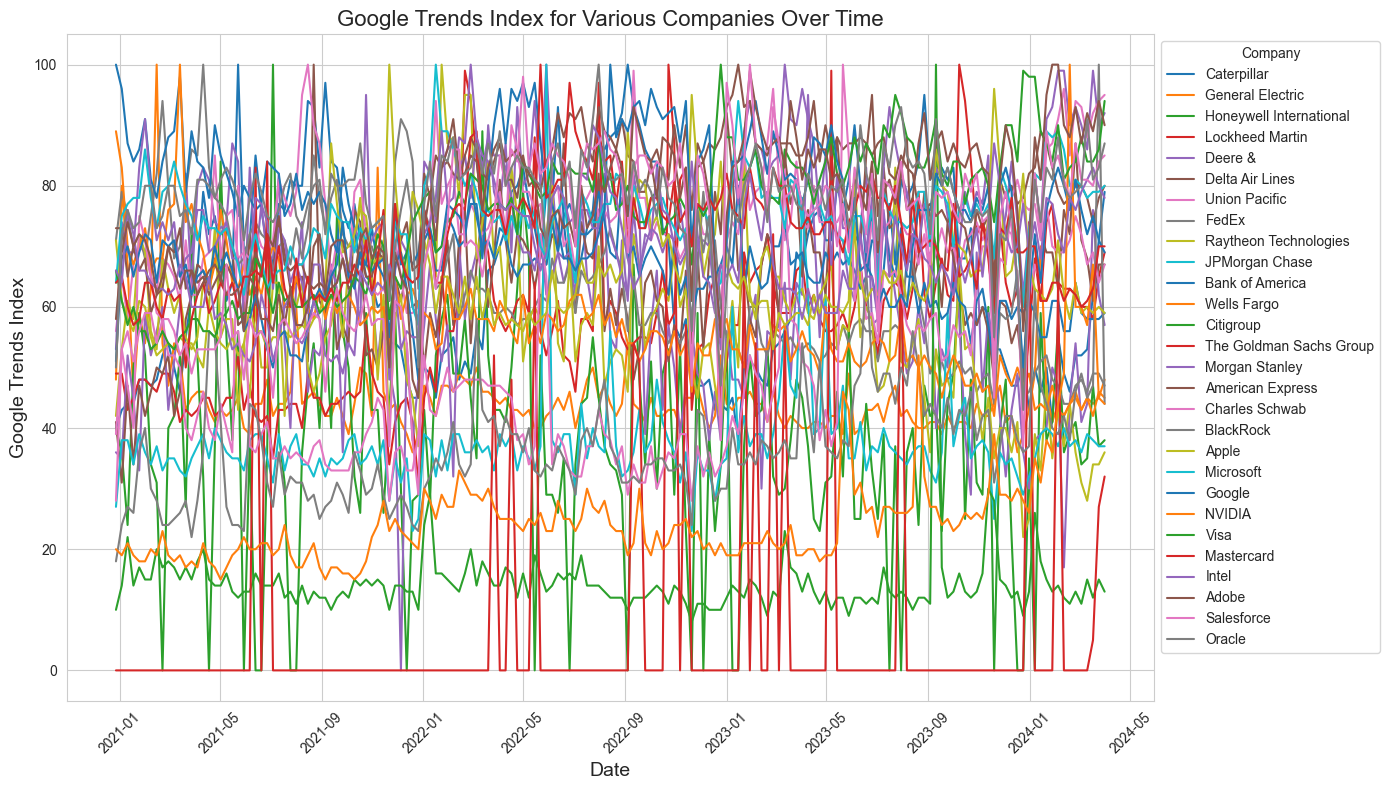

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Convert 'date' column to datetime
fin_trends_data['date'] = pd.to_datetime(fin_trends_data['date'])

# Setting the figure size and plotting
plt.figure(figsize=(14, 8))

# Plotting each company's trend line
for company in fin_trends_data.columns[1:]:  # Skipping the 'date' column
    plt.plot(fin_trends_data['date'], fin_trends_data[company], label=company)

# Enhancing the plot
plt.title('Google Trends Index for Various Companies Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Google Trends Index', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Company')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()